# 3. AutoEncoder
 - 차원축소 

## 3.1 문제 인식 
 - 대부분의 데이터는 소수의 변수로 표현할 수 있다
  - 성격 형용사: 수 천개 = 성격요인: 5개 + 1~2개
 - 차원 축소: 데이터를 소수의 변수로 표현하는 것
  - 예: 요인분석(FA), 주성분분석(PCA)

## 3.2 차원 축소 용도
 - 시각화
  - 많은 변수를 가진 데이터 -> 2차원으로 축소 -> 시각화
  - 시각화에서 변수가 많다. -> 차원이 많다 -> 보기 힘들고 그리기 힘들다. -> 2차원으로 줄인다.
  
 - 노이즈 제거
  - 차원이 축소되면 주요한 특징만 남음 -> 노이즈 제거
  - 차원이 높으면 노이즈가 많을 확률이 높다. => 차원을 줄일 때 가능한 내용을 많이 포함할 수 있도록 줄인다. (PCA)

![img3](src/0610/auto/3.PNG)

 - 유사성
  - 작은 차원에서 비교가 더 쉽고 정확할 수 있음

 - 데이터 생성
  - 차원 축소 -> 약간의 변화 -> 원래 차원으로 복구
 

![img1](src/0610/auto/1.PNG)

 - Input Shape : 784
 - Output Shape : 784 동일하게 
 - 중간으로 갈 수록 줄어든다. 
 
![img1](src/0610/auto/2.PNG)
![img1](src/0610/auto/4.PNG)

## 이미지 복원 
![img1](src/0610/auto/5.PNG)

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [3]:
_, width, height = x_train.shape

In [4]:
width

28

## 데이터 보기 

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt 

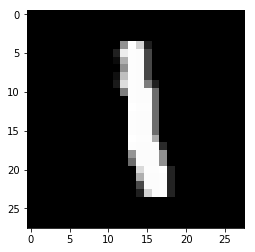

In [7]:
plt.imshow(x_train[6,],cmap='gray')

In [8]:
y_train[6]

1

## 데이터 전처리 

In [9]:
x_train.astype('float32')
input_train = x_train / 255.0
x_test.astype('float32')
input_test = x_test  / 255.0

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import Adam

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(width,height,))) # 784로 만들어주는 효과 
model.add(Dense(196,activation='relu'))
model.add(Dense(49,activation='relu'))
model.add(Dense(196,activation='relu'))
model.add(Dense(width*height, activation='sigmoid')) 
# softmax가 아니라 sigmoid가 나온 이유는 결과를 그대로 출력해야 되니깐. 
# 원복하는 느낌으로 하는것이다.
model.add(Reshape((width,height)))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 196)               153860    
_________________________________________________________________
dense_2 (Dense)              (None, 49)                9653      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               9800      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               154448    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 327,761
Trainable params: 327,761
Non-trainable params: 0
_________________________________________________________________


 - mse로하면 0.2 - 0.1 = 0.1 ^2 으로 해야되므로 그나마 색이 가장 비슷하도록 만들어주려고 mse를 사용 
 - 뭘 사용해도 크게 변하는게 없다고는 한다. 

In [13]:
model.compile(loss='mse',
              optimizer=Adam(),
              metrics=['mse'])

In [14]:
batch_size = 128
epochs = 7

 - input_train이 들어가서 input_train이 나와야 된다.

In [15]:
history = model.fit(input_train, input_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, input_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 4s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 2/7
60000/60000 [==============================] - 3s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 3/7
60000/60000 [==============================] - 2s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/7
60000/60000 [==============================] - 2s - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 5/7
60000/60000 [==============================] - 3s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 6/7
60000/60000 [==============================] - 3s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7/7
6000

In [16]:
input_regen = model.predict(input_test)

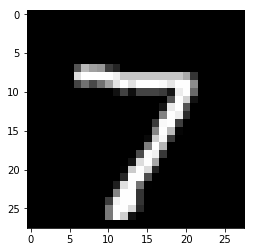

In [17]:
plt.imshow(input_test[0,], cmap='gray')

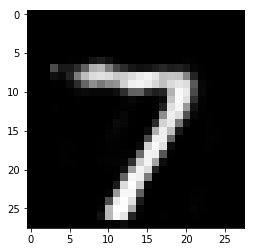

In [18]:
plt.imshow(input_regen[0,], cmap='gray')

## 노이즈 제거 

In [19]:
import numpy as np

In [20]:
np.random.normal(scale=0.2, size=(width, height))[:1]
# 평균이 0 이고 표준편차가 0.2인 정규 분포 생성.

array([[-0.39989141, -0.22319088,  0.04684294, -0.18300795,  0.08375335,
         0.07602899, -0.08442226,  0.54114196,  0.39790913,  0.04700243,
        -0.08484798, -0.0522912 , -0.20539976, -0.16775749,  0.11748794,
        -0.02572264,  0.28832584,  0.24820864,  0.07828157, -0.08051534,
        -0.203257  , -0.17657842,  0.04923957,  0.31316393, -0.01393563,
        -0.42566216, -0.03817569,  0.00568235]])

In [21]:
noise = input_test + np.random.normal(scale=0.2, size=(width, height))

In [22]:
noise[1,1]

array([ 0.17221764,  0.0165918 , -0.12682235,  0.20189582, -0.6112805 ,
       -0.06996042,  0.08622505,  0.23280964, -0.02682088,  0.13984273,
        0.03264182, -0.34890275, -0.28865885,  0.09243602,  0.18132087,
        0.06074435,  0.26922136,  0.27557581, -0.10735164, -0.29737936,
       -0.23307369,  0.03983526,  0.23424512, -0.44435803, -0.08747408,
       -0.24458775, -0.14776542, -0.26286131])

In [23]:
noise = np.clip(noise, 0, 1) # 0보다 작은 값이 나오면 0 1보다 큰값이 나오면 1

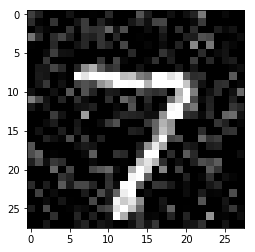

In [24]:
plt.imshow(noise[0,], cmap='gray')

In [25]:
denoise = model.predict(noise)

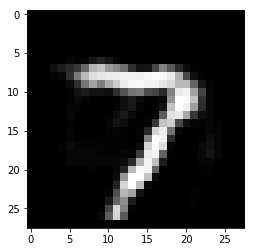

In [26]:
plt.imshow(denoise[0,], cmap='gray')

## 모델 Save 

In [27]:
model.save("model_save.sav")

## 모델 Load

In [28]:
from keras.models import load_model

In [29]:
model = load_model("model_save.sav")

In [30]:
output = model.predict(input_test)

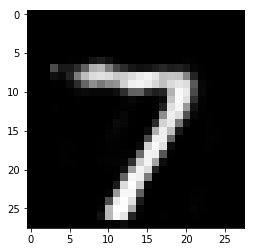

In [31]:
plt.imshow(output[0,], cmap='gray')